## Import the necessary software libraries:

In [5]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from .utils import plot_value_function, plot_policy, make_epsilon_greedy_policy, make_random_policy

ModuleNotFoundError: No module named 'utils'

## Create the environment, value table and policy

#### Create the environment

In [3]:
env = Maze()

#### Create the $Q(s, a)$ table

In [4]:
action_values = np.zeros(shape=(5, 5, 4))

#### Create the policy $\pi(s)$

In [5]:
def policy(state, epsilon=0.):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

#### Plot the value table $Q(s,a)$

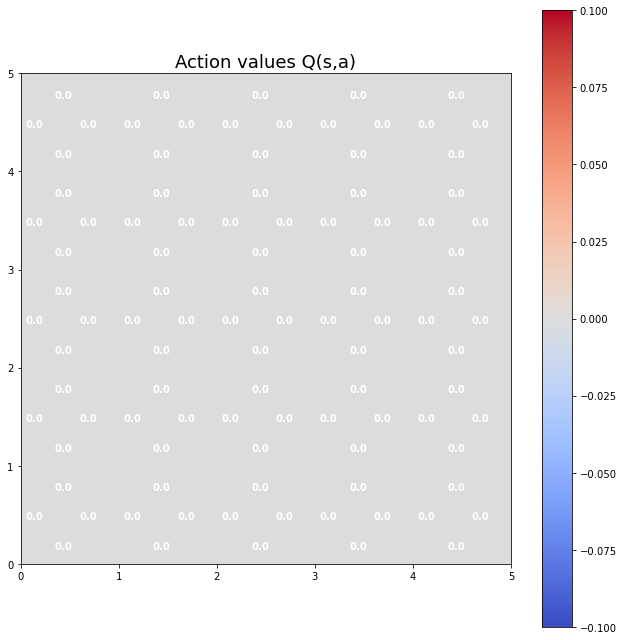

In [6]:
plot_action_values(action_values)

#### Plot the policy

C:\ProgramData\Anaconda3\lib\site-packages\pyglet\image\codecs\wic.py:406: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


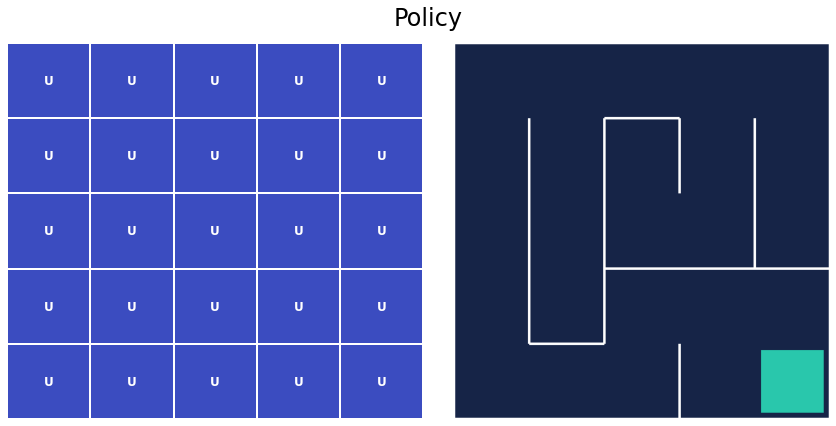

In [7]:
plot_policy(action_values, env.render(mode='rgb_array'))

## Implement the algorithm

</br>

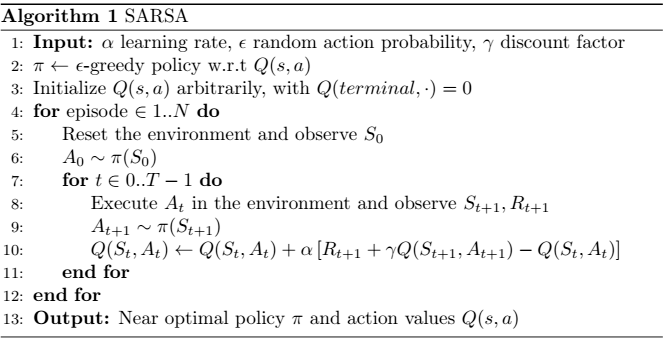

<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>

In [8]:
def sarsa(action_values, policy, episodes, alpha=0.1, gamma=0.99, epsilon=0.2):
    
    for episode in range(1, episodes + 1):
        state = env.reset()
        action = policy(state, epsilon)
        done = False
        while not done:
            next_state, reward, done, _ = env.step(action)
            next_action = policy(next_state, epsilon)
            
            qsa = action_values[state][action]
            next_qsa = action_values[next_state][next_action]
            action_values[state][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)
            state = next_state
            action = next_action

In [9]:
sarsa(action_values, policy, 100)

## Show results

#### Show resulting value table $Q(s,a)$

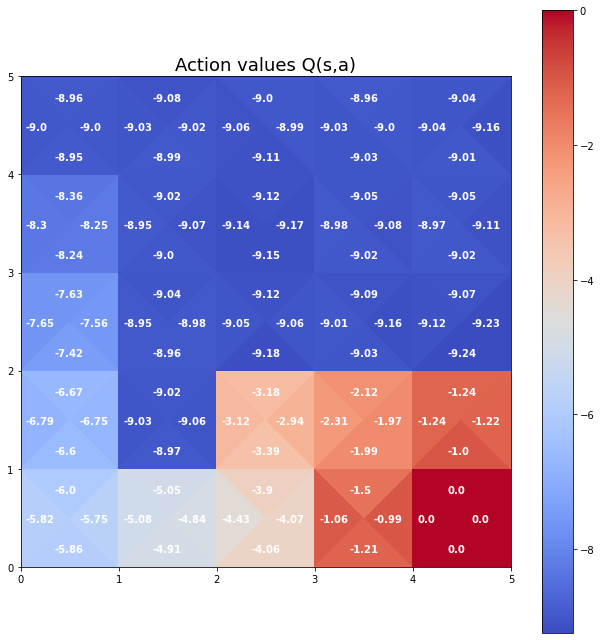

In [10]:
plot_action_values(action_values)

#### Show resulting policy $\pi(\cdot|s)$

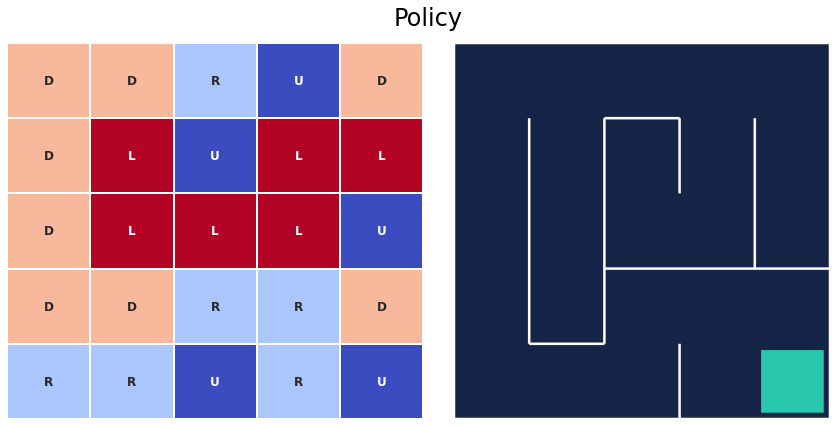

In [11]:
plot_policy(action_values, env.render(mode='rgb_array'))

#### Test the resulting agent

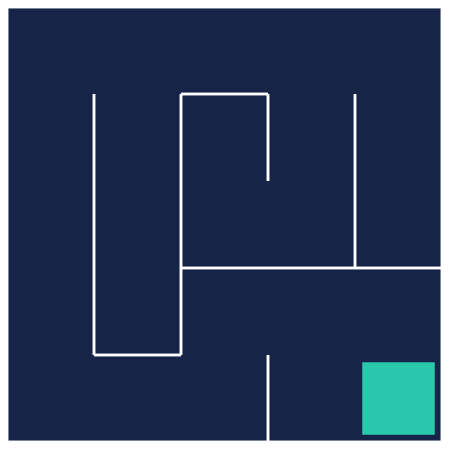

In [13]:
test_agent(env, policy)

## Resources

[[1] Reinforcement Learning: An Introduction. Ch. 6: Temporal difference learning](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)